## Two-dimensional Linear Systems

In this example we will consider a two dimensional, holonomic system. We would like to track the following state vector

$$x = \begin{bmatrix} p_{x} \\ p_{y} \\ v_{x} \\ v_{y} \end{bmatrix}$$

Where $p_{x}$ and $p_{y}$ are position in $x$ and $y$ dimensions, and $v_{x}$ and $v_{y}$ are velocities in respective dimensions.

The control vector is

$$u = \begin{bmatrix} a_{x} \\ a_{y} \end{bmatrix}$$

We can write how a holonomic system evolves using the laws of motion as:

$$p_{x+1} = p_{x} + v_{x} * dt + a_{x} * \frac{dt^2}{2}$$ <br>
$$p_{y+1} = p_{y} + v_{y} * dt + a_{y} * \frac{dt^2}{2}$$ <br>
$$v_{x+1} = v_{x} + a_{x} * dt$$ <br>
$$v_{y+1} = v_{y} + a_{y} * dt$$ <br>

We can re-write the equations in the following way:

$$p_{x+1} = p_{x} * 1 + p_{y} * 0 + v_{x} * dt + v_{y} * 0 + a_{x} * \frac{dt^2}{2} + a_{y} * 0$$ <br>
$$p_{y+1} = p_{x} * 0 + p_{y} * 1 + v_{x} * 0 + v_{y} * dt + a_{x} * 0 + a_{y} * \frac{dt^2}{2}$$ <br>
$$v_{x+1} = p_{x} * 0 + p_{y} * 0 + v_{x} * 1 + v_{y} * 0 + a_{x} * dt + a_{y} * 0$$ <br>
$$v_{y+1} = p_{x} * 0 + p_{y} * 0 + v_{x} * 0 + v_{y} * 1 + a_{x} * 0 + a_{y} * dt$$ <br>

Each of these equations is a sum of products of six variables. Four of these variables ($p_{x}, p_{y}, v_{x}, v_{y}$) are from the state itself and two ($a_{x}, a_{y}$) are from the controls. All six are present in each equation, but are multiplied by 1s, 0s or $dt$s. We can find the matrices $A$ and $B$ from this form equations easily. $A$ will be extracted using the first four terms in these equations and $B$ will be found from the last two terms.

$$A = \begin{bmatrix} 1 & 0 & dt & 0 \\ 0 & 1 & 0 & dt \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}$$

$$B = \begin{bmatrix} \frac{dt^2}{2} & 0 \\ 0 & \frac{dt^2}{2} \\ dt & 0 \\ 0 & dt \end{bmatrix}$$

Finally we can write our system of linear equations as:

$$x_{i+1} = Ax_{i} + Bu_{i}$$

$$x_{i+1} = \begin{bmatrix} 1 & 0 & dt & 0 \\ 0 & 1 & 0 & dt \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} p_{xi} \\ p_{yi} \\ v_{xi} \\ v_{yi} \end{bmatrix} + \begin{bmatrix} \frac{dt^2}{2} & 0 \\ 0 & \frac{dt^2}{2} \\ dt & 0 \\ 0 & dt \end{bmatrix} \begin{bmatrix} a_{xi} \\ a_{yi} \end{bmatrix}$$

An interesting point to note: This system has two degrees of freedom, and it also has one control for each degree of freedom, which makes it a fully actuated system (if there are no limits on the acceleration, ofcourse)

Now,its time to simulate such a system

## Simulation

<IPython.core.display.Javascript object>


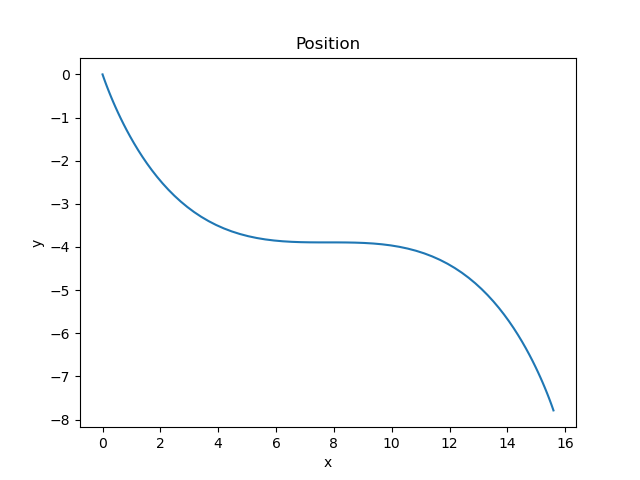

<IPython.core.display.Javascript object>


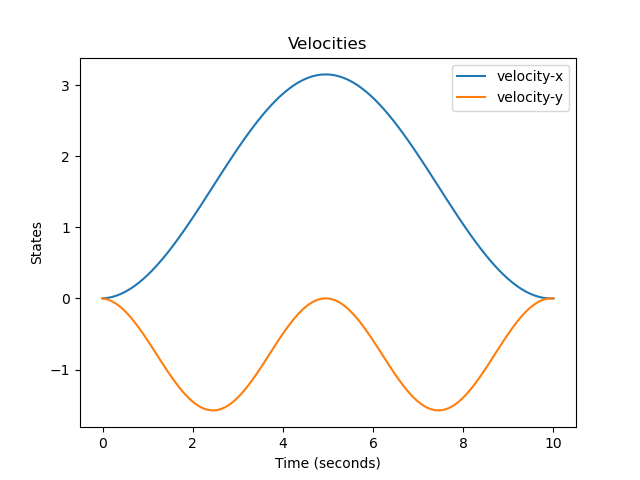

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Total simulation time (seconds)
T = 10

# delta-time (Resolution)
dt = 0.1  # 0.1 seconds

# Number of simulation time-steps
steps = int(T/dt)

# Ground truth states
x_gt = []

# Simulation Time
t = np.linspace(0, T, steps)

# Generating sine-wave acceleration commands
u = np.array([
    np.sin(np.linspace(0, 2*np.pi, steps)),
    np.sin(np.linspace(2*np.pi, -2*np.pi, steps))
]).T

# State transition matrix
A = np.array([
    [1, 0, dt, 0],
    [0, 1, 0, dt],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# Control transition matrix
B = np.array([
    [0.5 * dt**2, 0],
    [0, 0.5 * dt**2],
    [dt, 0],
    [0, dt]
])

# Specifying initial state (Starting from [0, 0, 0])
x = np.array([
    [0],  # px
    [0],  # py
    [0],  # vx
    [0]   # vy
])

# Simulation loop
for i in range(len(u)):
    x = A@x + B@u[i, :][:, np.newaxis]
    x_gt.append(x)

# Converting into numpy array
x_gt = np.squeeze(np.array(x_gt))

# Plotting the simulation data
plt.figure()
plt.title('Position')
plt.plot(x_gt[:, 0], x_gt[:, 1], label='position')
plt.xlabel('x')
plt.ylabel('y')

plt.figure()
plt.title('Velocities')
plt.plot(t, x_gt[:, 2], label='velocity-x')
plt.plot(t, x_gt[:, 3], label='velocity-y')
plt.xlabel('Time (seconds)')
plt.ylabel('States')
plt.legend(loc='best')
plt.show()

## Generating noisy measurements from this ground-truth simulation data

<IPython.core.display.Javascript object>


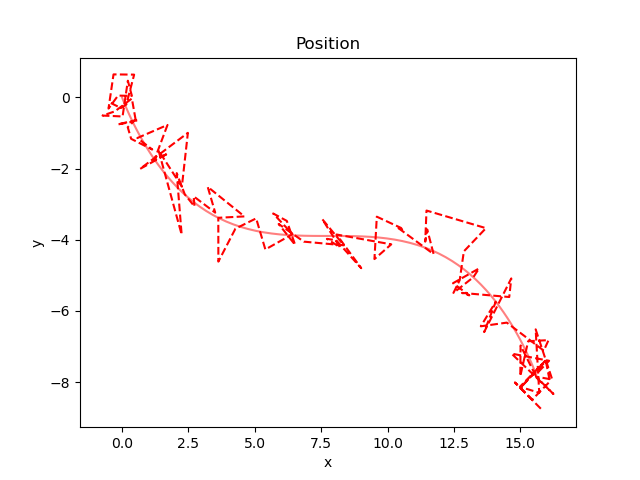

<IPython.core.display.Javascript object>


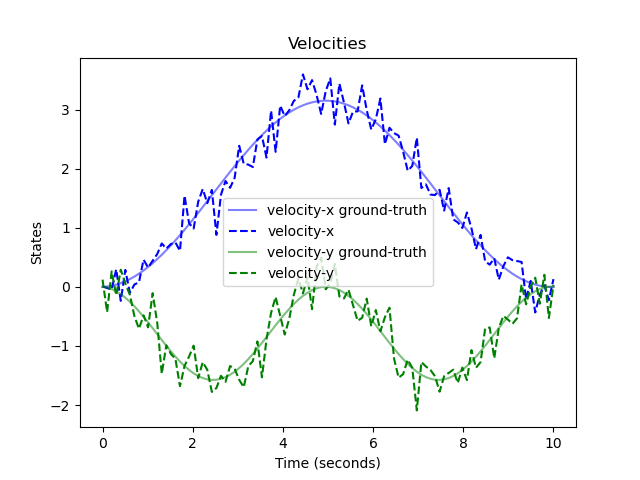

In [2]:
import copy

# copying ground-truth
x_noisy = copy.deepcopy(x_gt)

# Adding gaussian noise
x_noisy[:,0] += np.random.normal(loc=0, scale=0.5, size=x_noisy.shape[0])
x_noisy[:,1] += np.random.normal(loc=0, scale=0.5, size=x_noisy.shape[0])
x_noisy[:,2] += np.random.normal(loc=0, scale=0.25, size=x_noisy.shape[0])
x_noisy[:,3] += np.random.normal(loc=0, scale=0.25, size=x_noisy.shape[0])

# Plotting the simulation data
plt.figure()
plt.title('Position')
plt.plot(x_gt[:, 0], x_gt[:, 1], 'r', label='position ground-truth', alpha=0.5)
plt.plot(x_noisy[:, 0], x_noisy[:, 1], 'r--', label='position measurement')
plt.xlabel('x')
plt.ylabel('y')

plt.figure()
plt.title('Velocities')
plt.plot(t, x_gt[:, 2], 'b', label='velocity-x ground-truth', alpha=0.5)
plt.plot(t, x_noisy[:, 2], 'b--', label='velocity-x')
plt.plot(t, x_gt[:, 3], 'g', label='velocity-y ground-truth', alpha=0.5)
plt.plot(t, x_noisy[:, 3], 'g--', label='velocity-y')
plt.xlabel('Time (seconds)')
plt.ylabel('States')
plt.legend(loc='best')
plt.show()

## Filtering this noisy data
Assuming the states are measured directly and are synchronous

(100, 4)


<IPython.core.display.Javascript object>


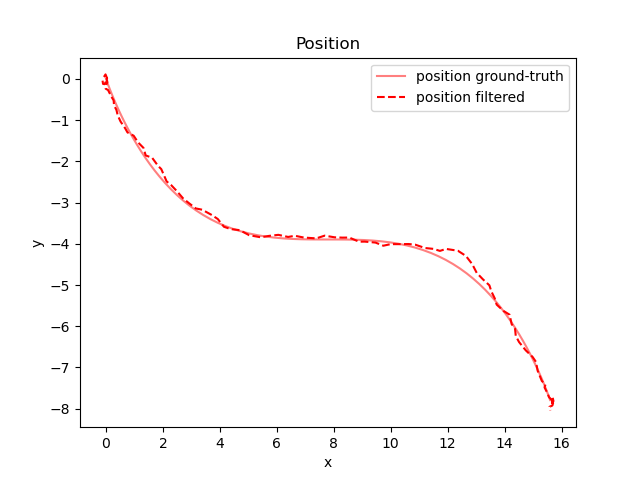

<IPython.core.display.Javascript object>


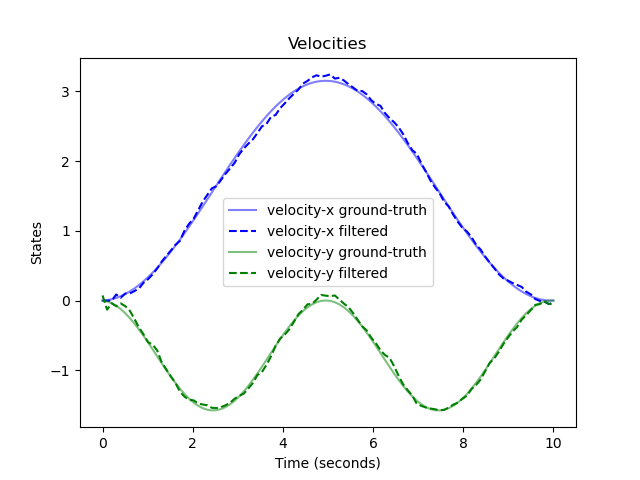

In [9]:
# filtered states
x_filtered = []

# We will use the same A, B, u, k and dt as used in simulation

# In addition, we have to define the observation matrix, that maps the state vector into
# a form that can be compared with the measurements

# Observation matrix
H = np.array([
    [1, 0, 0, 0],  # px selection
    [0, 1, 0, 0],  # py selection
    [0, 0, 1, 0],  # vx selection
    [0, 0, 0, 1]   # vy selection
])

# Initial state
x = np.array([
    [0], # px
    [0], # py
    [0], # vx
    [0]  # vy
])

# Process covariance (In our case it should be zero, because our control applied during
# simuation had no noisy actuation, but still we will consider some level of process noise
# just for the sake of this implementation)
Q = np.eye(4)        # 3x3 process noise matrix
Q[0, 0] = 0.05 **2   # px variance
Q[1, 1] = 0.05 **2   # py variance
Q[2, 2] = 0.025 **2  # vx variance
Q[3, 3] = 0.025 **2  # vy variance

# Measurement covariance (amount of noise in measured quantities)
R = np.eye(4)        # 3x3 measurement noise matrix
R[0, 0] = 0.5 **2    # px measurement variance
R[1, 1] = 0.5 **2    # py measurement variance
R[2, 2] = 0.25 **2   # vx measurement variance
R[3, 3] = 0.25 **2   # vy measurement variance

# Initial process covariance (confidence in intial state specified)
P = np.eye(4) * 0.1

# Simulating
for i in range(len(u)):
    
    # ==== PREDICTION STEP ====
    # 1. Extrapolating the state
    x = A@x + B@u[i, :][:, np.newaxis]  # Ax + Bu
    
    # 2. Extrapolating the process covariance matrix
    P = A@P@A.T + Q
    
    # Getting the noisy measurements from the sensor
    measurement = x_noisy[i, :][:, np.newaxis]
    
    # ==== CORRECTION STEP ====
    # 1. Kalman Gain
    K = P@H.T @ np.linalg.inv(H@P@H.T + R)
    
    # 2. Update State Estimate
    x = x + K @ (measurement - H@x)
    
    # 3. Update Estimate Uncertainity
    P = (np.eye(len(x)) - K@H) @ P @ (np.eye(len(x)) - K@H).T + K@R@K.T
    
    # Appending the filtered position to list
    x_filtered.append(x)
    
# Converting to numpy array
x_filtered = np.squeeze(np.array(x_filtered))

print(x_filtered.shape)

# Plotting the simulation data
plt.figure()
plt.title('Position')
plt.plot(x_gt[:, 0], x_gt[:, 1], 'r', label='position ground-truth', alpha=0.5)
plt.plot(x_filtered[:, 0], x_filtered[:, 1], 'r--', label='position filtered')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

plt.figure()
plt.title('Velocities')
plt.plot(t, x_gt[:, 2], 'b', label='velocity-x ground-truth', alpha=0.5)
plt.plot(t, x_filtered[:, 2], 'b--', label='velocity-x filtered')
plt.plot(t, x_gt[:, 3], 'g', label='velocity-y ground-truth', alpha=0.5)
plt.plot(t, x_filtered[:, 3], 'g--', label='velocity-y filtered')
plt.xlabel('Time (seconds)')
plt.ylabel('States')
plt.legend(loc='best')
plt.show()